# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Read datasets

In [2]:
Cab = pd.read_csv("Cab_Data.csv")
Customer = pd.read_csv("Customer_ID.csv")
Transaction = pd.read_csv("Transaction_ID.csv")
City = pd.read_csv("City.csv")

# Merge dataset based on a specific column

In [3]:
data1 = pd.merge(Cab, City, on="City")
data1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [4]:
data2 = pd.merge(Transaction, Customer, on="Customer ID")
data2.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237


In [5]:
final_df = pd.merge(data1, data2, on="Transaction ID")
final_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Card,Male,28,10813
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Card,Male,27,9237
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Cash,Male,53,11242
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Cash,Male,23,23327
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Card,Male,33,8536


# Check data types

In [6]:
final_df.dtypes

Transaction ID          int64
Date of Travel         object
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Population             object
Users                  object
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
dtype: object

- "Date of Travel" is object so we should convert it to datetime to analyze

In [7]:
final_df['Date of Travel'] = pd.to_datetime(final_df['Date of Travel'])

## Now separate date

In [8]:
final_df['Day'] = final_df['Date of Travel'].dt.day
final_df['Month'] = final_df['Date of Travel'].dt.month
final_df['Year'] = final_df['Date of Travel'].dt.year
final_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Day,Month,Year
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Card,Male,28,10813,1,8,2016
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Card,Male,27,9237,1,6,2016
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Cash,Male,53,11242,1,2,2016
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Cash,Male,23,23327,1,7,2016
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Card,Male,33,8536,1,3,2016


## Create new column

In [9]:
final_df['Profit'] = final_df['Price Charged'] - final_df['Cost of Trip']

In [10]:
final_df.sort_values(by='Date of Travel', inplace=True)
final_df.set_index('Date of Travel', inplace=True)

# EDA

In [11]:
final_df

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Day,Month,Year,Profit
Date of Travel,,,,,,,,,,,,,,,,,
2016-01-02,10004899,Yellow Cab,LOS ANGELES CA,25.53,402.89,327.8052,"1,595,037","144,132",7219,Cash,Male,18,13980,2,1,2016,75.0848
2016-01-02,10005402,Yellow Cab,WASHINGTON DC,44.08,694.53,587.1456,"418,859","127,001",53869,Card,Female,34,6570,2,1,2016,107.3844
2016-01-02,10004271,Pink Cab,BOSTON MA,38.61,358.05,405.4050,"248,968","80,021",59321,Cash,Male,45,22849,2,1,2016,-47.3550
2016-01-02,10004399,Pink Cab,SAN DIEGO CA,4.72,50.88,51.9200,"959,307","69,995",19497,Card,Male,30,11978,2,1,2016,-1.0400
2016-01-02,10005419,Yellow Cab,WASHINGTON DC,46.00,765.04,552.0000,"418,859","127,001",53389,Cash,Male,26,2702,2,1,2016,213.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,10435303,Yellow Cab,NEW YORK NY,39.20,1000.88,508.0320,"8,405,837","302,149",46,Card,Female,37,19348,31,12,2018,492.8480
2018-12-31,10435591,Yellow Cab,NEW YORK NY,37.74,918.58,511.7544,"8,405,837","302,149",1049,Card,Female,40,23646,31,12,2018,406.8256
2018-12-31,10434932,Yellow Cab,LOS ANGELES CA,22.88,396.35,315.7440,"1,595,037","144,132",6646,Cash,Female,31,7722,31,12,2018,80.6060


In [12]:
final_df.shape

(359392, 17)

## Statistical of each numerical column

In [13]:
final_df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Day,Month,Year,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,15.972835,7.156047,2017.045199,137.253198
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,8.503010,3.413283,0.800239,160.311840
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,1.000000,1.000000,2016.000000,-220.060000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,9.000000,4.000000,2016.000000,28.012000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,16.000000,8.000000,2017.000000,81.962000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,23.000000,10.000000,2018.000000,190.030000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,31.000000,12.000000,2018.000000,1463.966000


In [14]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 359392 entries, 2016-01-02 to 2018-12-31
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Company             359392 non-null  object 
 2   City                359392 non-null  object 
 3   KM Travelled        359392 non-null  float64
 4   Price Charged       359392 non-null  float64
 5   Cost of Trip        359392 non-null  float64
 6   Population          359392 non-null  object 
 7   Users               359392 non-null  object 
 8   Customer ID         359392 non-null  int64  
 9   Payment_Mode        359392 non-null  object 
 10  Gender              359392 non-null  object 
 11  Age                 359392 non-null  int64  
 12  Income (USD/Month)  359392 non-null  int64  
 13  Day                 359392 non-null  int64  
 14  Month               359392 non-null  int64  
 15  Year              

## Remove duplicates

In [15]:
final_df.drop_duplicates(inplace=True) 
sum(final_df.duplicated())

0

- The result is zero, which means there are no duplicates

## Unique values of each column

In [16]:
final_df.nunique()

Transaction ID        359392
Company                    2
City                      19
KM Travelled             874
Price Charged          99176
Cost of Trip           16291
Population                19
Users                     19
Customer ID            46148
Payment_Mode               2
Gender                     2
Age                       48
Income (USD/Month)     22725
Day                       31
Month                     12
Year                       3
Profit                303907
dtype: int64

## Check null values

In [17]:
final_df.isnull().sum()

Transaction ID        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Day                   0
Month                 0
Year                  0
Profit                0
dtype: int64

### Checking which cities have the most number of cabs

In [18]:
final_df['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

- New York City have the highest number of cabs

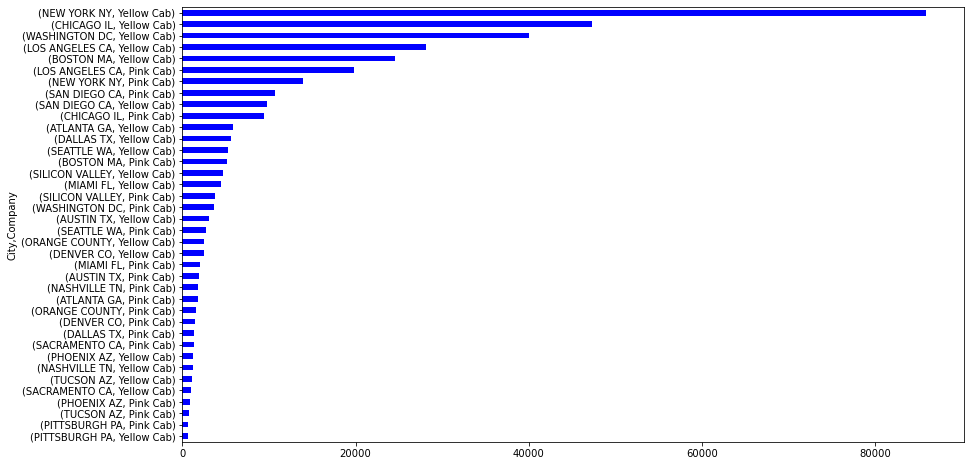

In [19]:
plt.figure(figsize=(14, 8))
groupby_City = final_df.groupby('City')
groupby_City['Company'].value_counts().sort_values(ascending=True).plot.barh(color = "blue")

- Yellow Cabs are the most cabs 

In [20]:
groupby_City = final_df.groupby('City')
groupby_City['Company'].value_counts()

City            Company   
ATLANTA GA      Yellow Cab     5795
                Pink Cab       1762
AUSTIN TX       Yellow Cab     3028
                Pink Cab       1868
BOSTON MA       Yellow Cab    24506
                Pink Cab       5186
CHICAGO IL      Yellow Cab    47264
                Pink Cab       9361
DALLAS TX       Yellow Cab     5637
                Pink Cab       1380
DENVER CO       Yellow Cab     2431
                Pink Cab       1394
LOS ANGELES CA  Yellow Cab    28168
                Pink Cab      19865
MIAMI FL        Yellow Cab     4452
                Pink Cab       2002
NASHVILLE TN    Pink Cab       1841
                Yellow Cab     1169
NEW YORK NY     Yellow Cab    85918
                Pink Cab      13967
ORANGE COUNTY   Yellow Cab     2469
                Pink Cab       1513
PHOENIX AZ      Yellow Cab     1200
                Pink Cab        864
PITTSBURGH PA   Pink Cab        682
                Yellow Cab      631
SACRAMENTO CA   Pink Cab       1334
 

- NASHVILLE TN, PITTSBURGH PA, SACRAMENTO CA and SAN DIEGO CA  are famous for its Pink Cabs

### Yearly Analysis

In [21]:
Yearly_group = final_df.groupby(['Year'])
(Yearly_group[['Profit']].median())

,Profit
Year,
2016,89.2440
2017,88.7386
2018,70.3776


Text(0, 0.5, 'Yearly Profit')

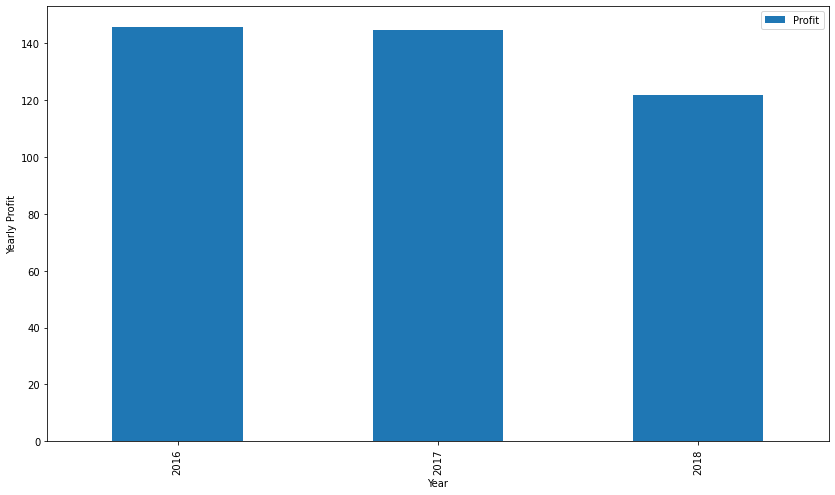

In [24]:
((Yearly_group[['Profit']].mean())).plot(kind='bar', figsize=(14,8))
plt.ylabel("Yearly Profit")

### Monthly Analysis

In [26]:
Monthly_group = final_df.groupby(['Month'])
(Monthly_group[['Profit']].median())

,Profit
Month,
1,93.4036
2,95.3660
3,91.9608
4,83.9600
5,94.9820
6,86.3020
7,68.1632
8,67.3325
9,82.1732


Text(0, 0.5, 'Monthly Profit')

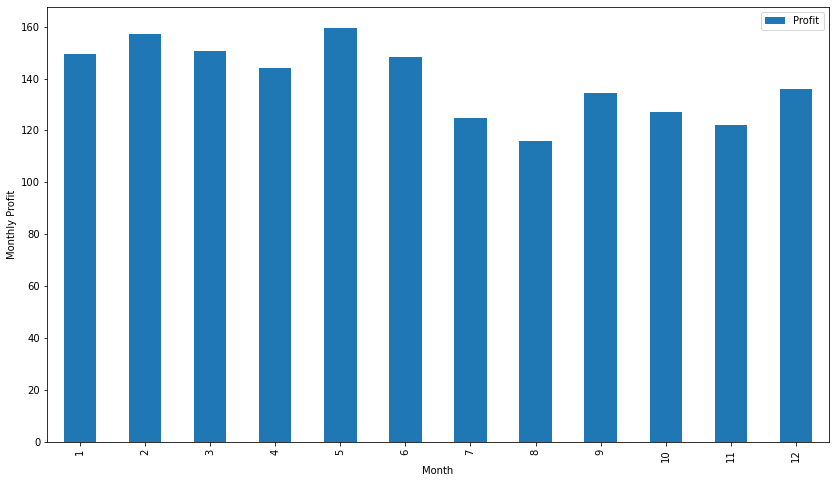

In [29]:
((Monthly_group[['Profit']].mean())).plot(kind='bar', figsize=(14,8))
plt.ylabel("Monthly Profit")

### Daily Analysis

In [28]:
Daily_group = final_df.groupby(['Day'])
(Daily_group[['Profit']].median())

,Profit
Day,
1,103.1290
2,109.0920
3,98.2800
4,100.2816
5,104.7780
6,90.7014
7,54.2800
8,54.1770
9,67.8320


Text(0, 0.5, 'Daily Profit')

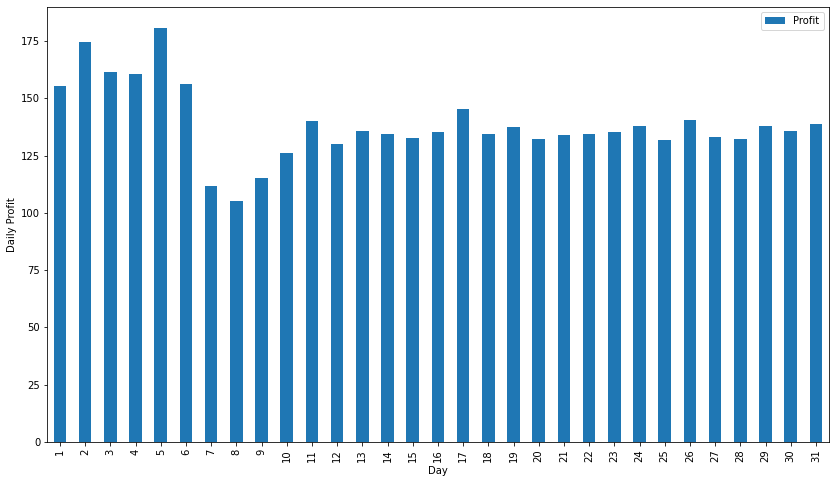

In [30]:
((Daily_group[['Profit']].mean())).plot(kind='bar', figsize=(14,8))
plt.ylabel("Daily Profit")

Text(0, 0.5, 'Profit')

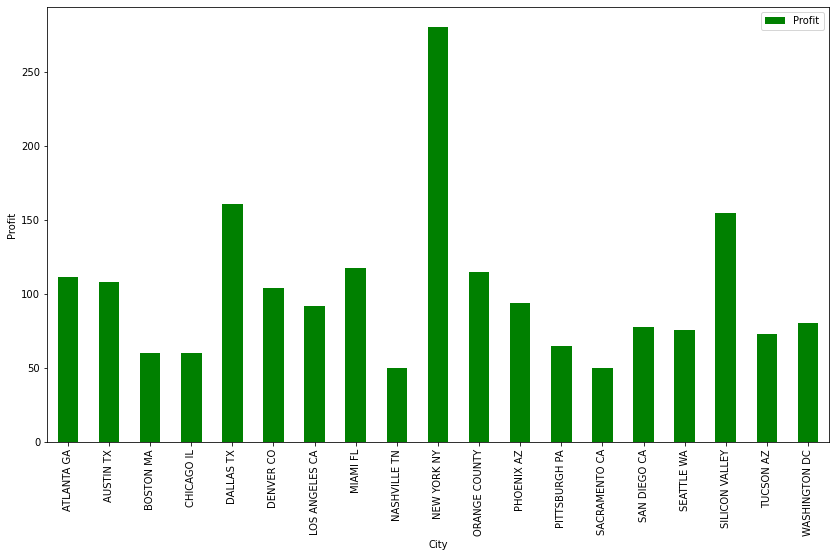

In [31]:
((groupby_City[['Profit']].mean())).plot(kind='bar', figsize=(14, 8), color = "green")
plt.ylabel("Profit")

- NEW YORK NY, DALLAS TX, SILICON VALLEY and MIAMI FL are the top cities with the highest profit

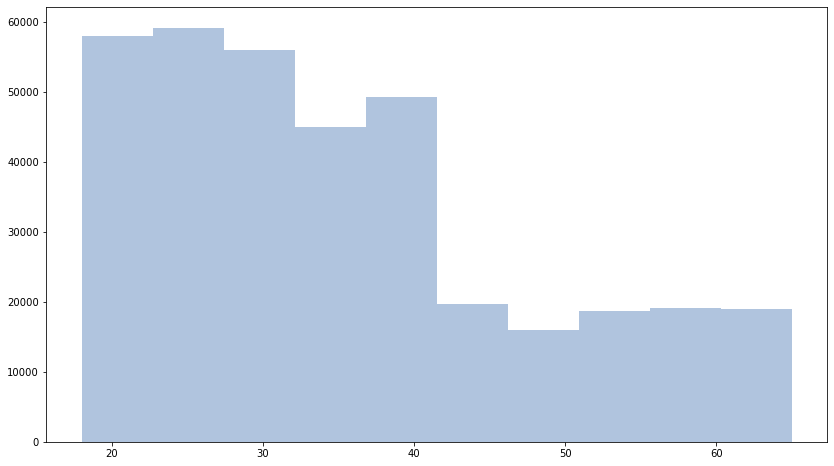

In [32]:
plt.figure(figsize=(14,8))
plt.hist(final_df.Age, bins=10, color='lightsteelblue')
plt.show()

- Most of the users are between 20 to 40 years

Text(0, 0.5, 'Profit')

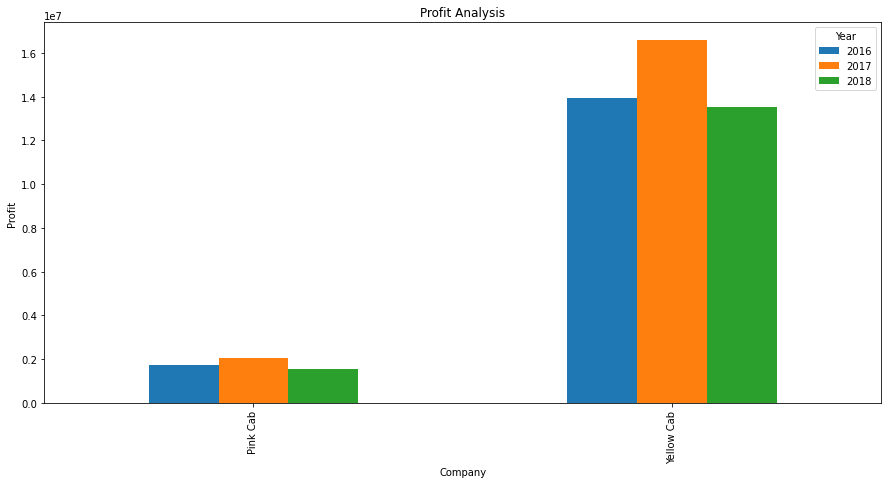

In [33]:
(final_df.pivot_table(index='Company', columns='Year', 
                values='Profit', aggfunc='sum')).plot(kind='bar', figsize=(15,7), title='Profit Analysis')
plt.ylabel("Profit")

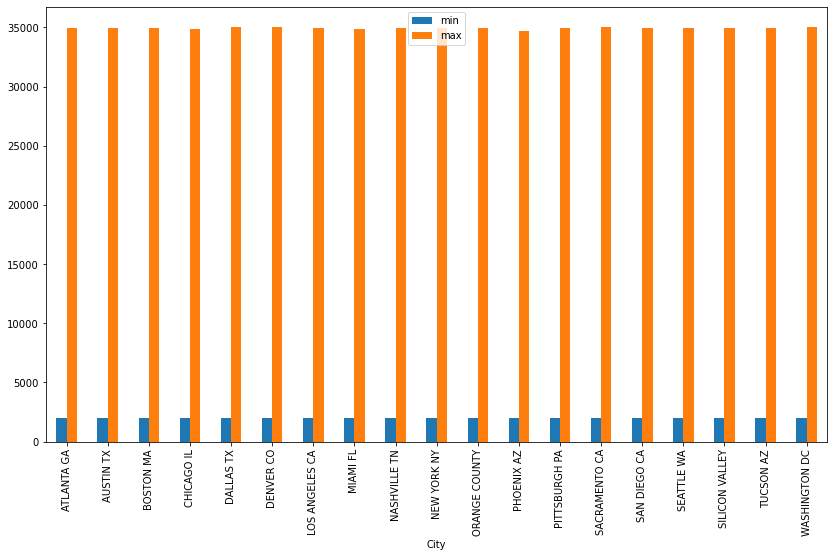

In [34]:
(groupby_City['Income (USD/Month)'].agg(['min', 'max'])).plot(kind='bar', figsize=(14,8));

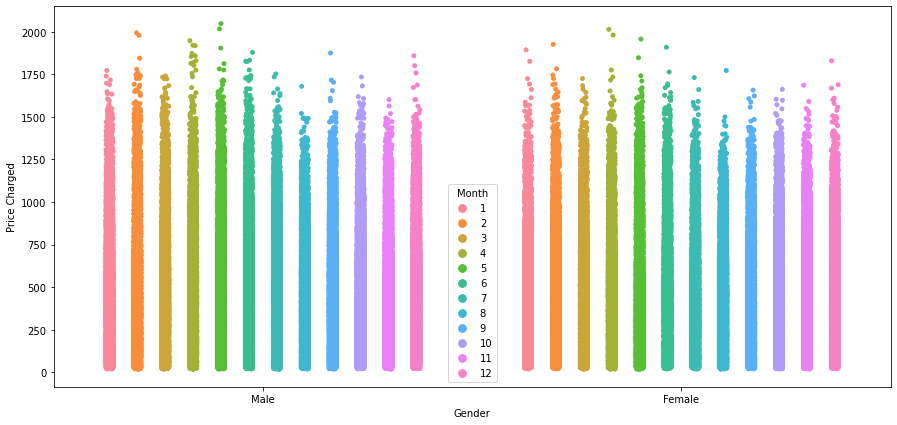

In [35]:
plt.figure(figsize=(15,7))
sns.stripplot(x="Gender", y="Price Charged", hue="Month", data = final_df, dodge=True)
plt.show()

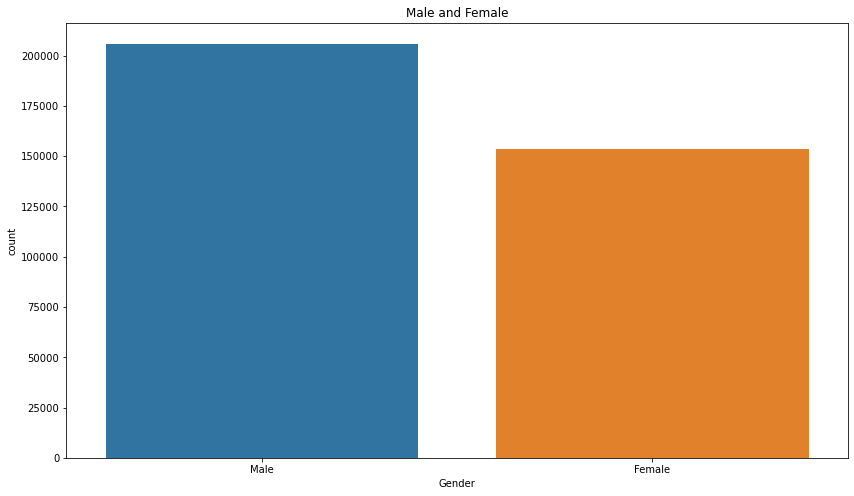

In [36]:
plt.figure(figsize=(14,8))
g=sns.countplot(x = 'Gender', data = final_df);
g.set_title('Male and Female')
plt.show()

In [37]:
final_df['Payment_Mode'].value_counts()

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64

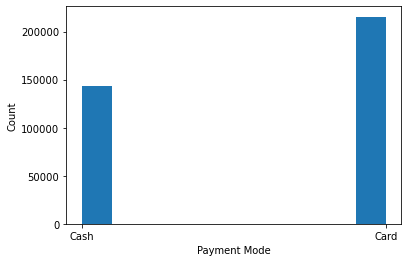

In [40]:
plt.hist(final_df.Payment_Mode)
plt.ylabel("Count")
plt.xlabel("Payment Mode")
plt.show()

# Hypothesis

In [41]:
final_df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Day,Month,Year,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,15.972835,7.156047,2017.045199,137.253198
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,8.503010,3.413283,0.800239,160.311840
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,1.000000,1.000000,2016.000000,-220.060000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,9.000000,4.000000,2016.000000,28.012000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,16.000000,8.000000,2017.000000,81.962000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,23.000000,10.000000,2018.000000,190.030000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,31.000000,12.000000,2018.000000,1463.966000


In [42]:
sample = int((10/100)*len(final_df))

# KM Travelled

- H0:  KM Travelled  =  22.56
- H1:  KM Travelled  !=  22.56

In [43]:
KM = np.random.choice(final_df["KM Travelled"], sample)
tset, pval = ttest_1samp(KM, 22.56)
print("p-values",pval)
if pval < 0.05:  
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

p-values 0.4941765552043045
we are accepting null hypothesis


# Price Charged

In [44]:
Price = np.random.choice(final_df["Price Charged"],sample)
tset, pval = ttest_1samp(Price, 423.44)
print("p-values",pval)
if pval < 0.05:   
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

p-values 0.9117946114385627
we are accepting null hypothesis


# Age

In [45]:
age = np.random.choice(final_df["Age"],sample)
tset, pval = ttest_1samp(age, 35)
print("p-values",pval)
if pval < 0.05:
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

p-values 3.5925808301741895e-09
 we are rejecting null hypothesis


# Income (USD/Month)

In [46]:
Income = np.random.choice(final_df["Income (USD/Month)"],sample)
tset, pval = ttest_1samp(Income, 15048.8)
print("p-values",pval)
if pval < 0.05:    
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

p-values 0.7255808612362521
we are accepting null hypothesis


# Profit

In [47]:
profit = np.random.choice(final_df["Profit"],sample)
tset, pval = ttest_1samp(profit, 137.25)
print("p-values",pval)
if pval < 0.05:    
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

p-values 0.2912017708287039
we are accepting null hypothesis


# Conclusion

- No duplicate data was found

- New York City have the highest number of cabs

- People prefer Yellow Cabs over Pink Cabs in every city except NASHVILLE TN, PITTSBURGH PA, SACRAMENTO CA and SAN DIEGO CA are famous for its Pink Cabs

- NEW YORK NY, DALLAS TX, SILICON VALLEY and MIAMI FL are the top cities with the highest profit

- Most of the users are between 20 to 40 years

- Card  is the most Payment Mode

# Reference


https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce